In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: set plotting style
sns.set(style="whitegrid")


In [2]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/gender_submission.csv')

In [6]:
#training data
print("Training data")
print(train_data.head(3))
#testing data
print("\n \n Testing data")
print(test_data.head(3))
#submission data
print(" \n \n Submission data")
print(submission.head(3))

Training data
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  

 
 Testing data
   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    

In [7]:
#Basic info about the datasets
print("Training data")
print(train_data.info())
print("\n \n Testing data")
print(test_data.info())
print("\n \n Submission data")
print(submission.info())

Training data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

 
 Testing data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  4

In [8]:
#Summary statistics
print("Training data")
print(train_data.describe())
print("\n \n Testing data")
print(test_data.describe())
print("\n \n Submission data")
print(submission.describe())

Training data
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

 
 Testing data
       PassengerId      Pclass         Age       S

In [9]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [22]:
# Fill missing Age with median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Fill Embarked with mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

<ipython-input-22-cde3f339036b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)


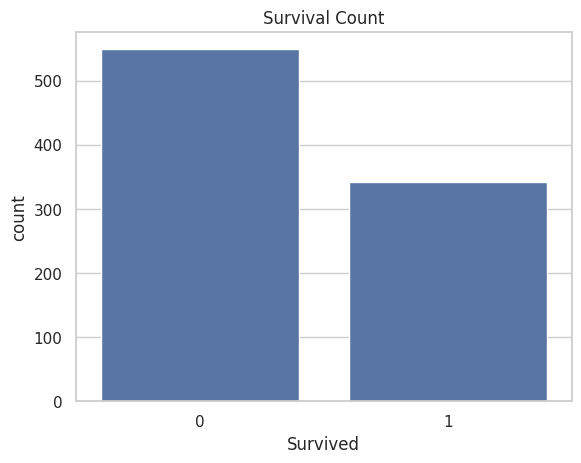

In [23]:
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()

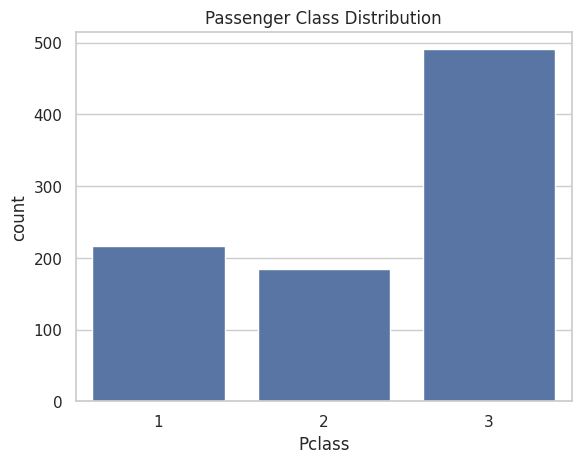

In [24]:
sns.countplot(x='Pclass', data=train_data)
plt.title('Passenger Class Distribution')
plt.show()

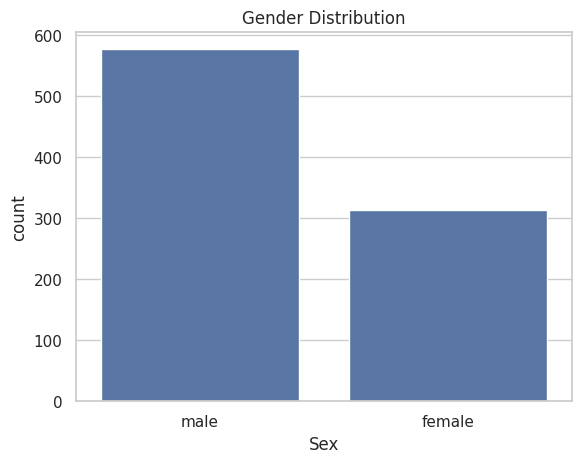

In [25]:
sns.countplot(x='Sex', data=train_data)
plt.title('Gender Distribution')
plt.show()

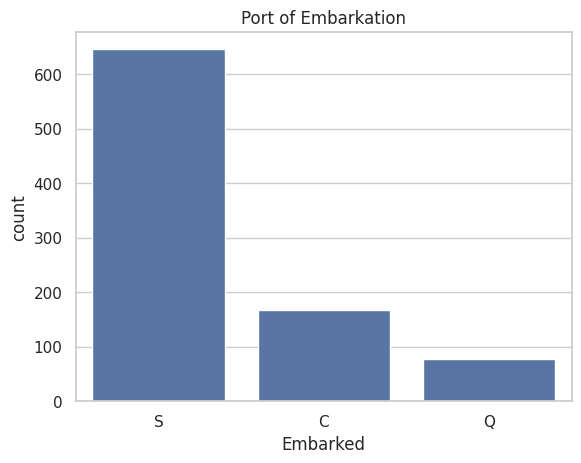

In [26]:
sns.countplot(x='Embarked', data=train_data)
plt.title('Port of Embarkation')
plt.show()

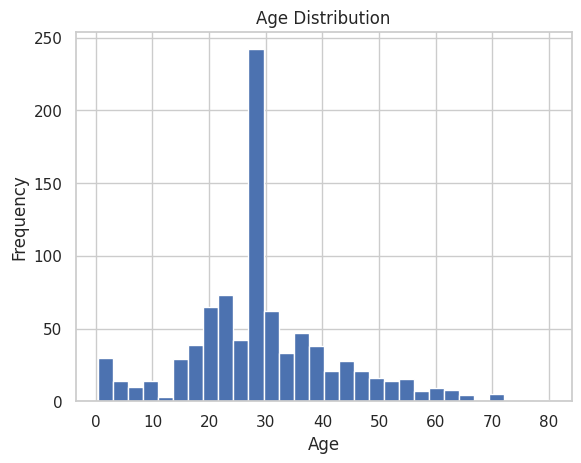

In [27]:
train_data['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


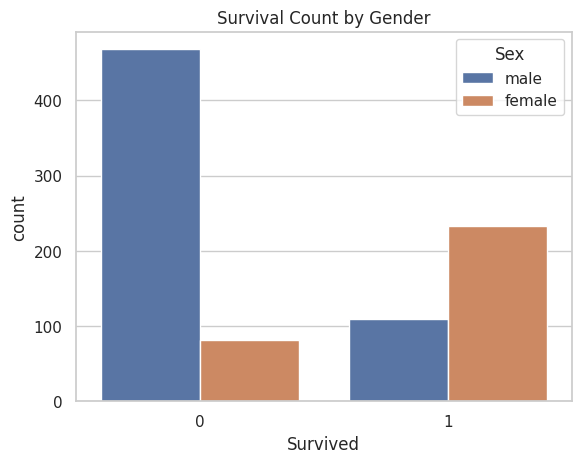

In [28]:
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival Count by Gender')
plt.show()


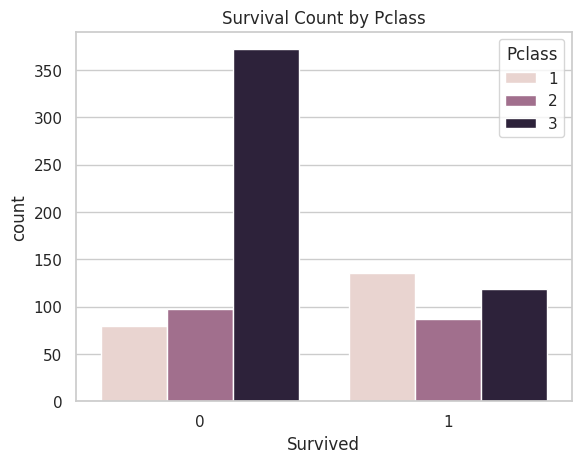

In [29]:
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival Count by Pclass')
plt.show()


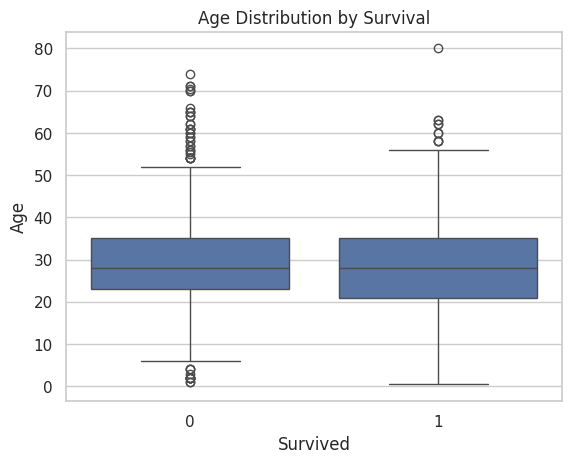

In [30]:
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title('Age Distribution by Survival')
plt.show()


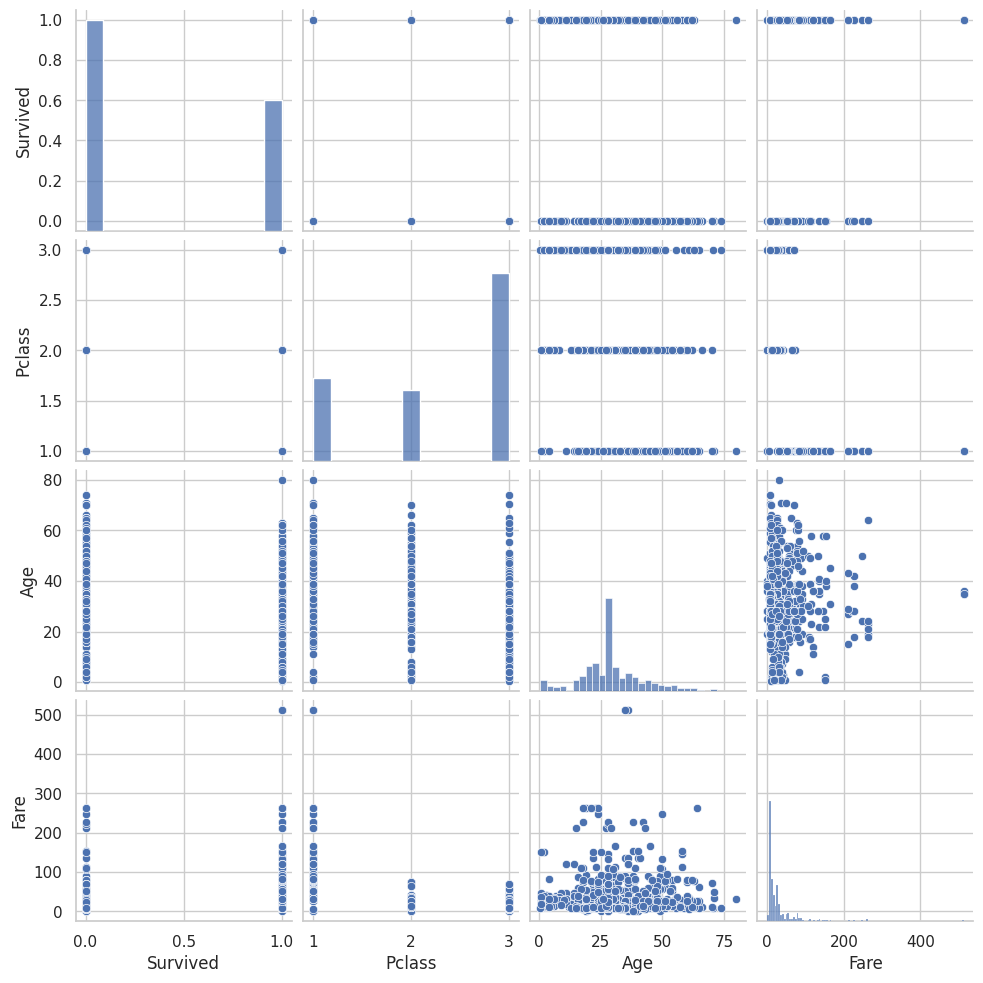

In [31]:
sns.pairplot(train_data[['Survived', 'Pclass', 'Age', 'Fare']])
plt.show()

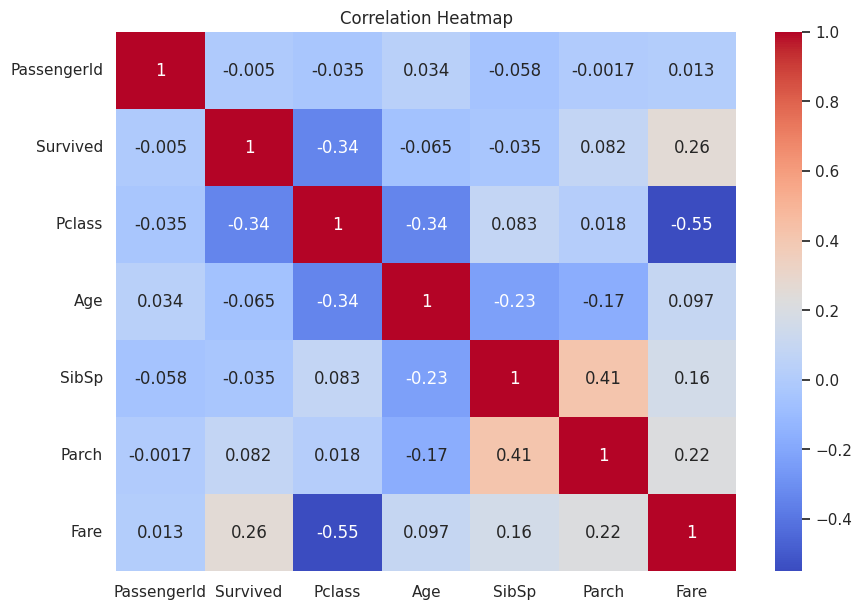

In [34]:
plt.figure(figsize=(10,7))
# Select only numerical features for correlation analysis
numerical_features = train_data.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

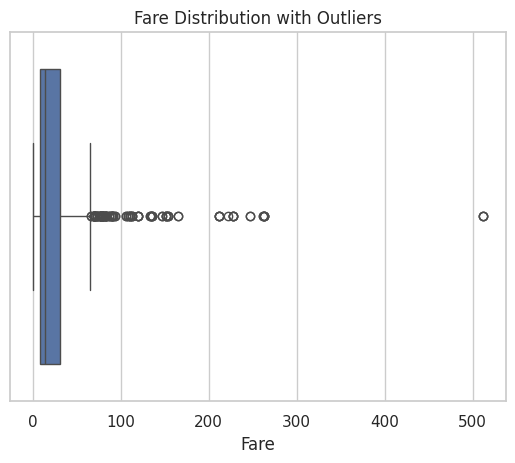

In [33]:
sns.boxplot(x=train_data['Fare'])
plt.title('Fare Distribution with Outliers')
plt.show()